In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import librosa
import librosa.display

import dataProcesser as dp

In [2]:
path= 'usedvoice/man1(50)1.wav'

In [3]:
y, sr = librosa.load(path)

In [4]:
mfcc = librosa.feature.mfcc(y=y, sr=22050, n_mfcc=13)

In [5]:
print(y.shape, mfcc.shape)

(157577,) (13, 308)


In [6]:
mfcc_8 = mfcc[7,:]

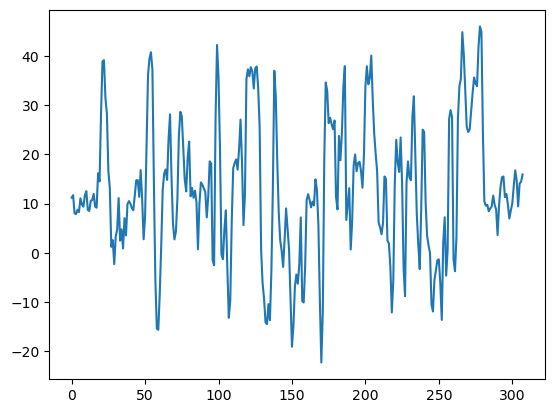

In [7]:
plt.plot(mfcc_8)

In [8]:
mfccs_zeros = np.copy(mfcc)
mfccs_zeros[:7,:] = 0
mfccs_zeros[8:,:] = 0

In [9]:
from scipy.fftpack import idct
mfccs_inv = idct(mfccs_zeros, axis=-1, norm='ortho')

In [10]:
mfccs_inv.shape

(13, 308)

In [11]:
stft = np.abs(librosa.stft(y))
power_spec = stft**2
mel_basis = librosa.filters.mel(sr=sr, n_fft=2048, n_mels=13)

In [12]:
mel_basis.shape

(13, 1025)

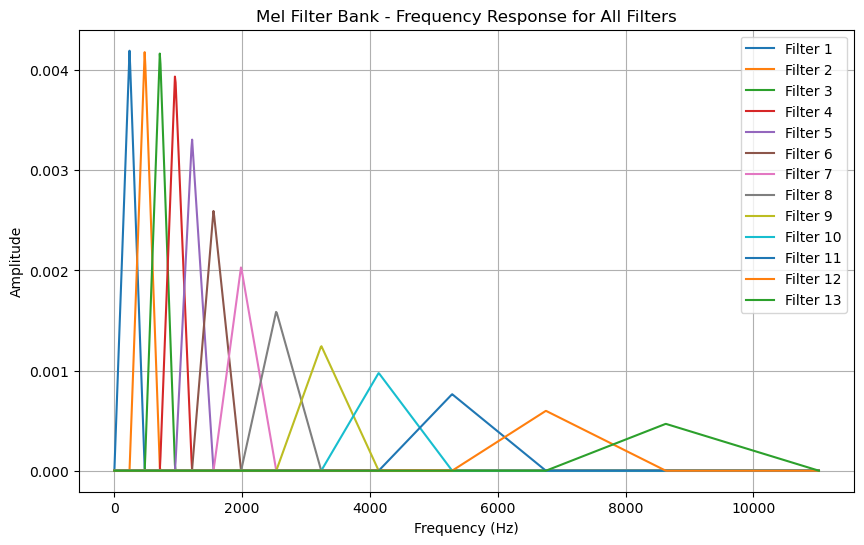

In [13]:
fft_frequencies = librosa.fft_frequencies(sr=sr, n_fft=2048)

plt.figure(figsize=(10, 6))
for i in range(13):
    plt.plot(fft_frequencies, mel_basis[i], label=f'Filter {i+1}')
plt.title('Mel Filter Bank - Frequency Response for All Filters')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

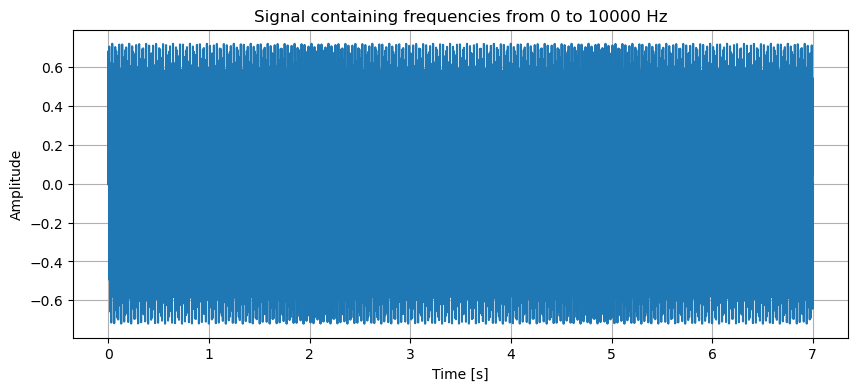

In [14]:
# サンプリング周波数
fs = 22050

# 信号の長さ（秒）
duration = 7.0

# 時間軸の生成
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# 周波数成分を含む信号の生成
frequencies = np.linspace(0, 10000, num=100)
signal = np.zeros_like(t)

for f in frequencies:
    signal += np.sin(2 * np.pi * f * t)

# 信号の正規化
signal /= len(frequencies)

# 信号のプロット
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title('Signal containing frequencies from 0 to 10000 Hz')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [15]:
signal

array([0.        , 0.68153318, 0.02603968, ..., 0.0414904 , 0.00699196,
       0.04499799])

In [16]:
print(mel_basis[0,:])

[-0.          0.0001906   0.00038121 ...  0.          0.
  0.        ]


In [17]:
start_indices = []
eng_indices = []
for i in range(13):
    print(f"hello {i}")
    flag = False
    flag2 = True
    for j, tmp in enumerate(mel_basis[i, :]):
        if flag2 and tmp != 0:
            print(j)
            start_indices.append(j)
            flag = True
            flag2 = False
        if flag and tmp == 0:
            print(j)
            eng_indices.append(j)
            break

hello 0
1
45
hello 1
23
67
hello 2
45
89
hello 3
67
113
hello 4
89
145
hello 5
113
185
hello 6
145
236
hello 7
185
301
hello 8
236
385
hello 9
301
491
hello 10
385
628
hello 11
491
802
hello 12
628
1024


In [18]:
list(zip(start_indices, eng_indices))

[(1, 45),
 (23, 67),
 (45, 89),
 (67, 113),
 (89, 145),
 (113, 185),
 (145, 236),
 (185, 301),
 (236, 385),
 (301, 491),
 (385, 628),
 (491, 802),
 (628, 1024)]

In [19]:
list(zip(fft_frequencies[start_indices], fft_frequencies[eng_indices]))

[(10.7666015625, 484.4970703125),
 (247.6318359375, 721.3623046875),
 (484.4970703125, 958.2275390625),
 (721.3623046875, 1216.6259765625),
 (958.2275390625, 1561.1572265625),
 (1216.6259765625, 1991.8212890625),
 (1561.1572265625, 2540.91796875),
 (1991.8212890625, 3240.7470703125),
 (2540.91796875, 4145.1416015625),
 (3240.7470703125, 5286.4013671875),
 (4145.1416015625, 6761.42578125),
 (5286.4013671875, 8634.814453125),
 (6761.42578125, 11025.0)]

In [20]:
mel_spectrogram = np.dot(mel_basis, power_spec)

In [21]:
mel_spectrogram.shape

(13, 308)

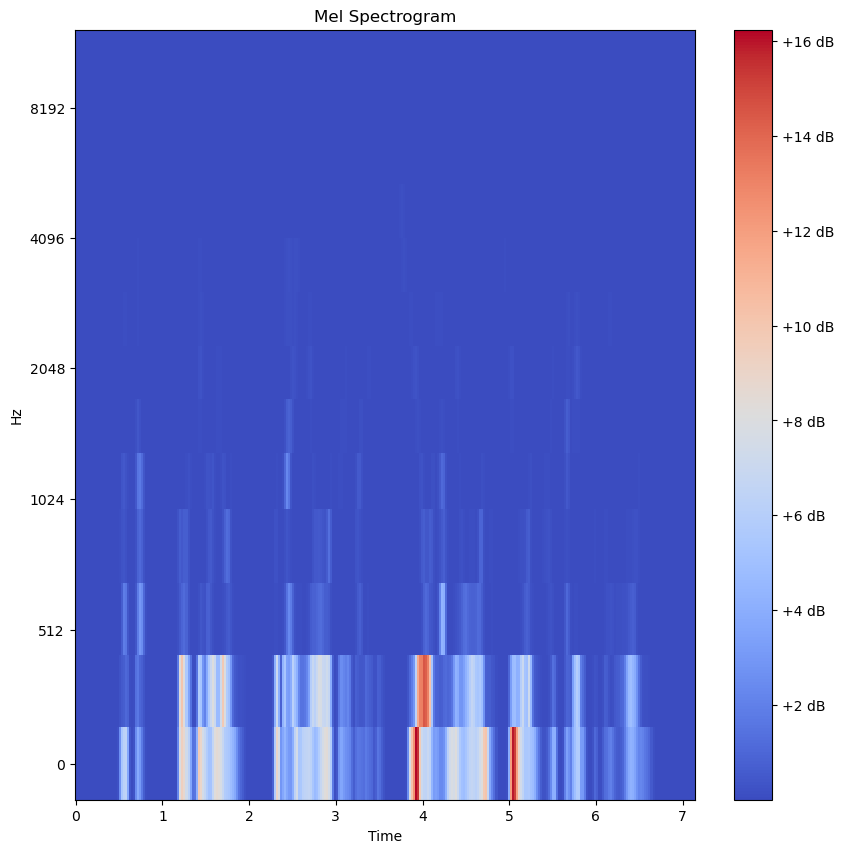

In [22]:
plt.figure(figsize=(10, 10))
librosa.display.specshow(mel_spectrogram, sr=sr, hop_length=512, x_axis='time', y_axis='mel', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()

In [23]:
mel_spectrogram_zeros = np.copy(mel_spectrogram)
mel_spectrogram_zeros[:12,:] = 0

In [24]:
mel_bias_inv = np.linalg.pinv(mel_basis)

In [25]:
restored_power_spec = np.dot(mel_bias_inv, mel_spectrogram_zeros)

In [26]:
restored_power_spec.shape

(1025, 308)

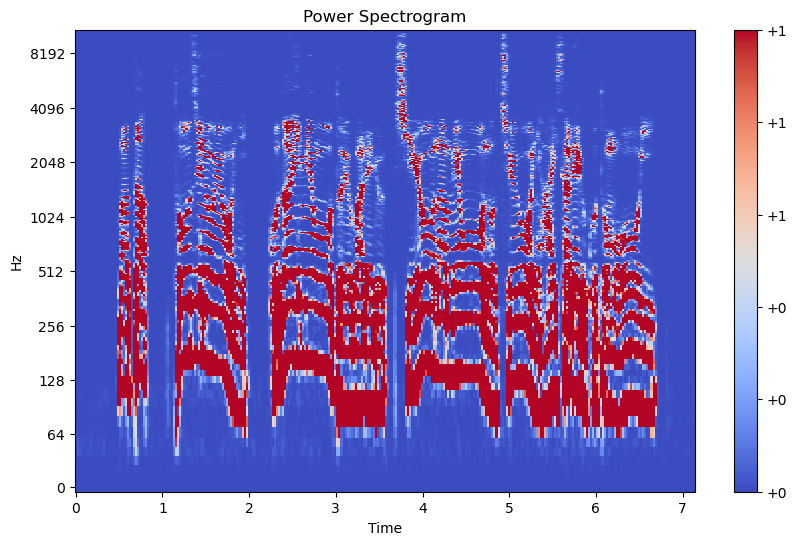

In [27]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(power_spec, sr=sr, hop_length=512, x_axis='time', y_axis='log', vmax=1, vmin=0, cmap='coolwarm')
plt.colorbar(format='%+2.0f')
plt.title('Power Spectrogram')
plt.show()

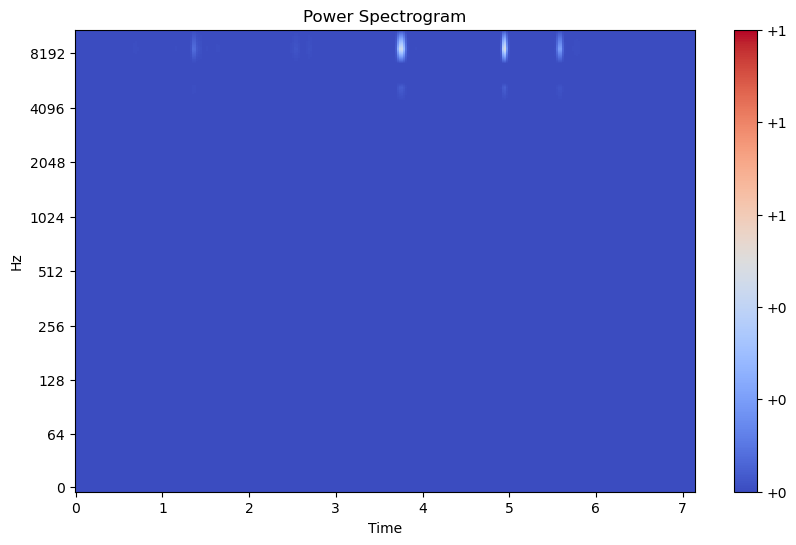

In [28]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(restored_power_spec, sr=sr, hop_length=512, x_axis='time', y_axis='log', vmax=1, vmin=0)
plt.colorbar(format='%+2.0f')
plt.title('Power Spectrogram')
plt.show()

279.96048 -72.75346


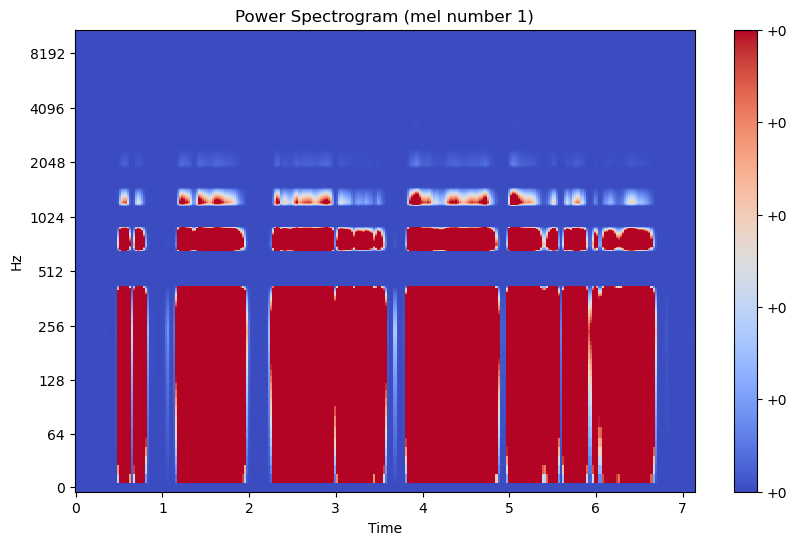

266.1322 -68.46385


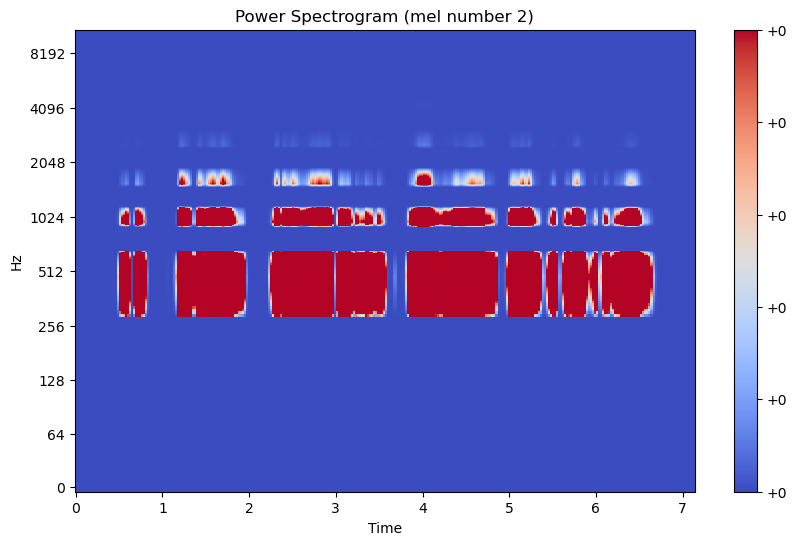

79.025375 -21.154465


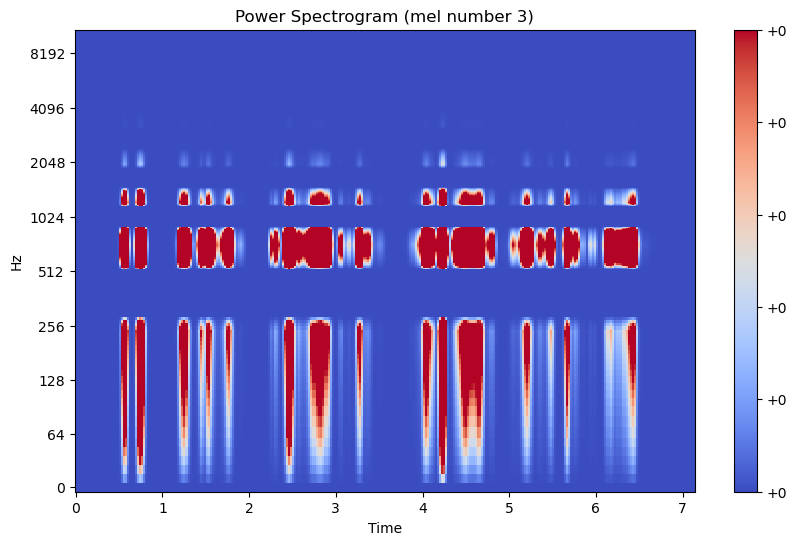

25.009115 -6.7302103


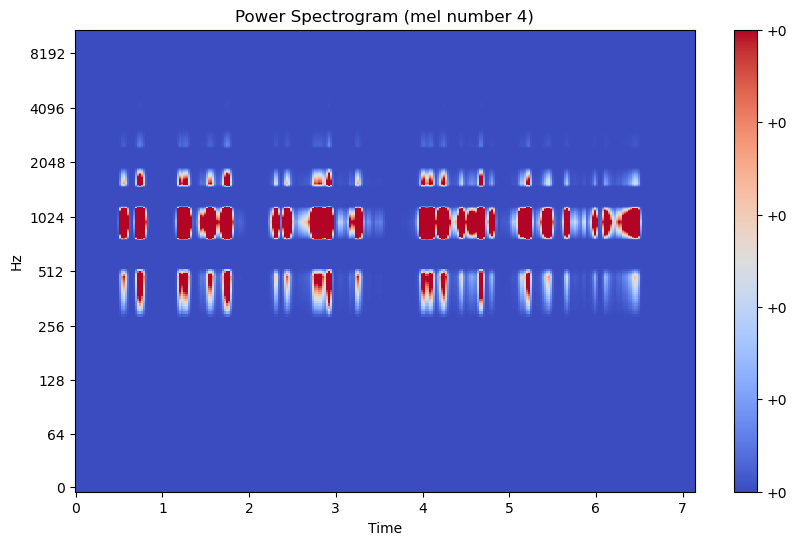

42.35511 -11.79203


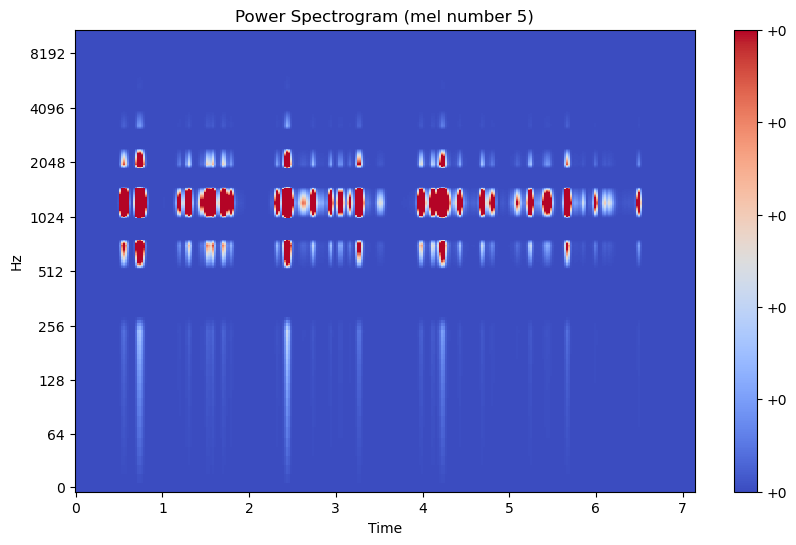

15.812249 -4.614269


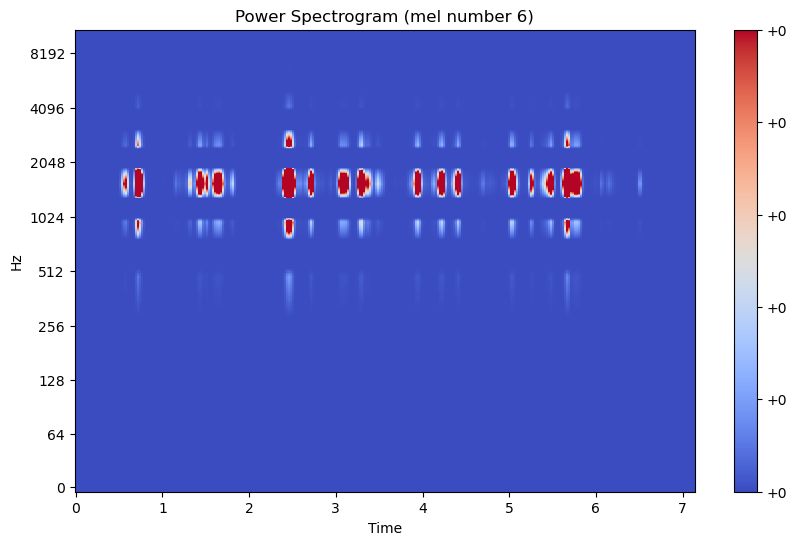

8.584438 -2.5757368


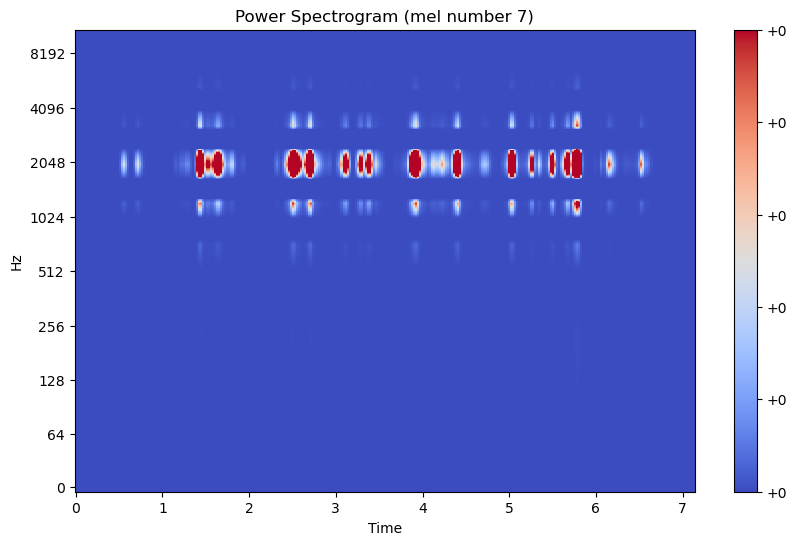

3.256618 -0.9804467


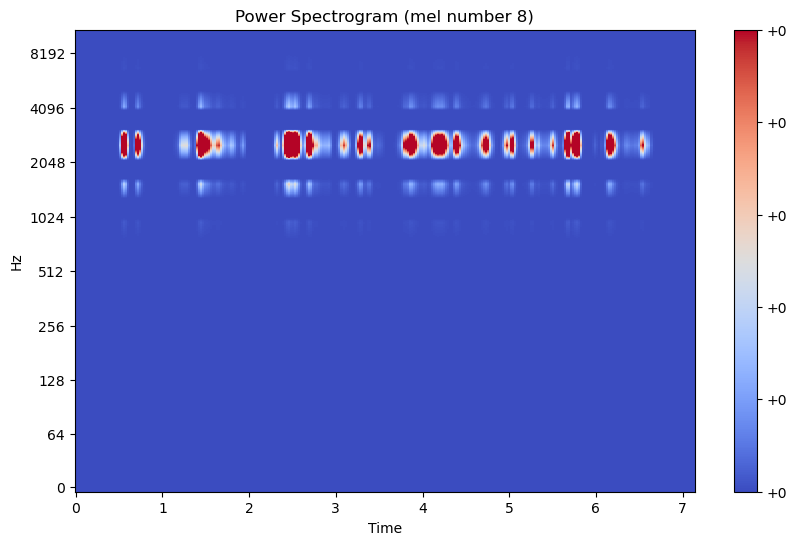

4.0884805 -1.2247875


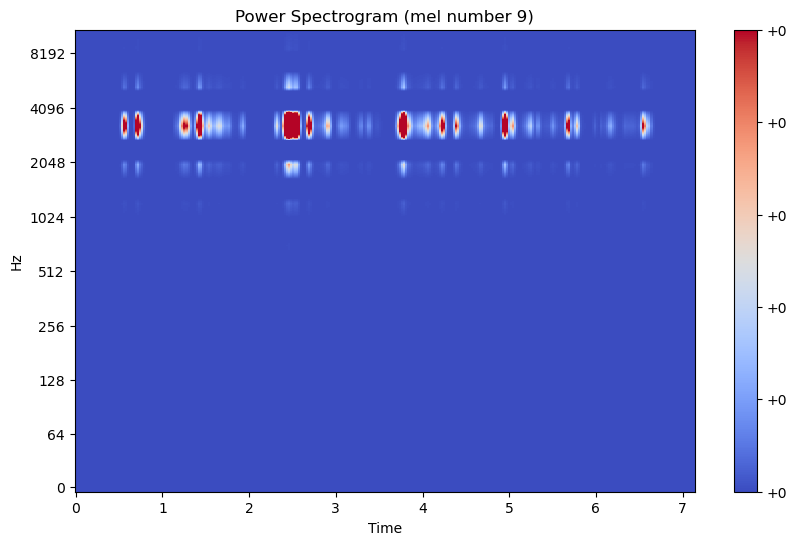

2.733124 -0.8121104


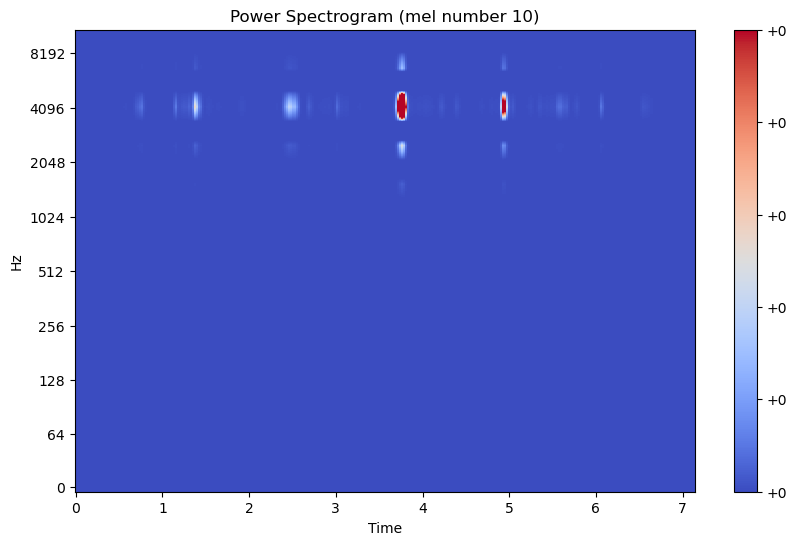

1.0953696 -0.3284967


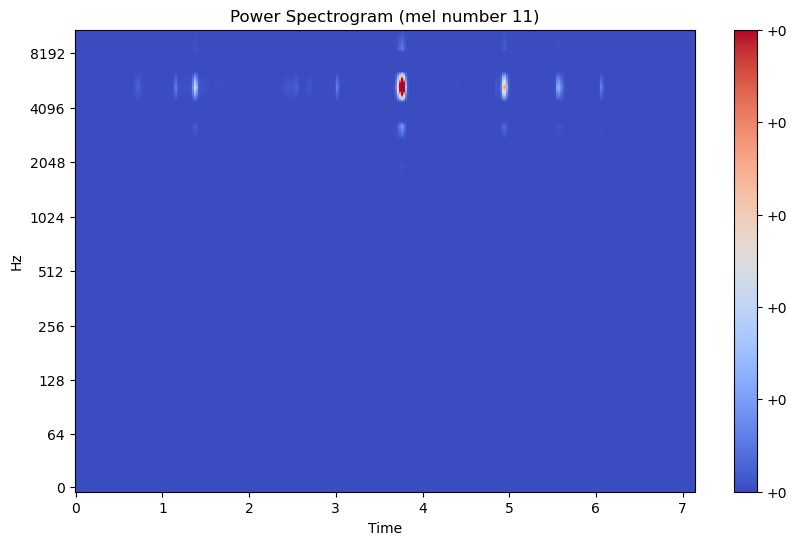

0.9369148 -0.28063062


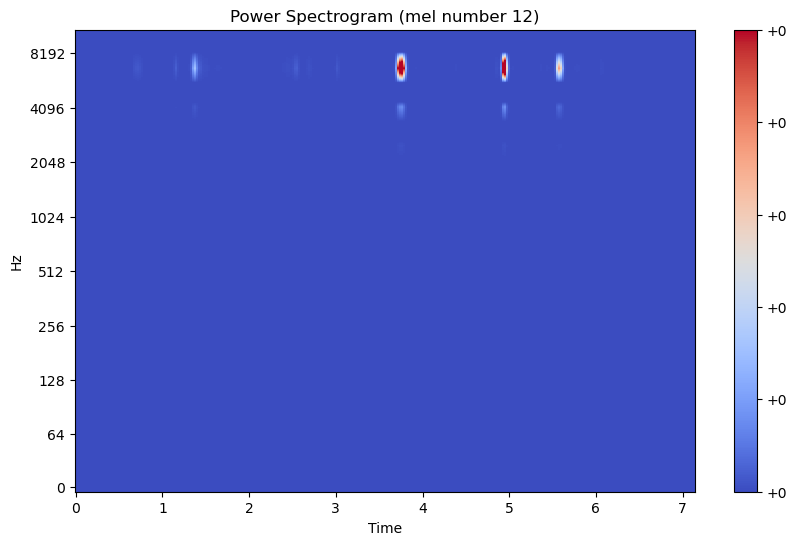

0.48328304 -0.14522988


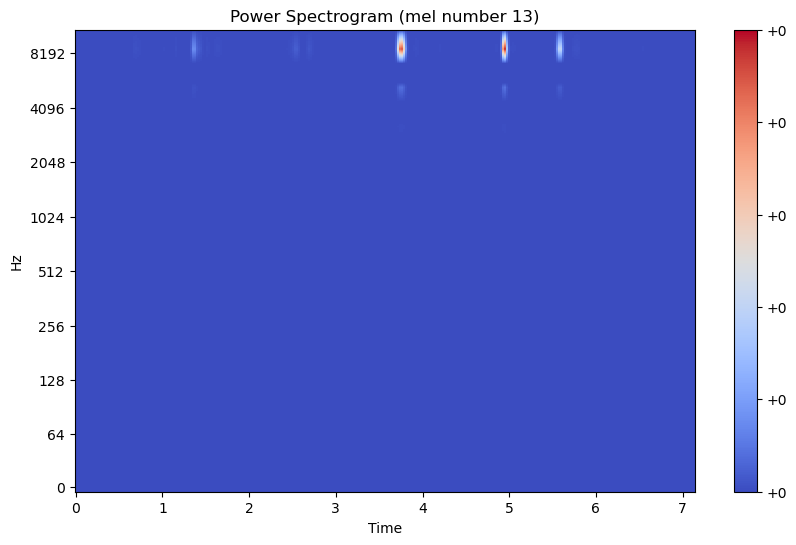

In [29]:
for i in range(13):
    mel_spectrogram_zeros = np.copy(mel_spectrogram)
    if i == 0:
        mel_spectrogram_zeros[1:, :] = 0
    elif i == 12:
        mel_spectrogram_zeros[:12, :] = 0
    else:
        mel_spectrogram_zeros[:i, :] = 0
        mel_spectrogram_zeros[i+1:, :] = 0
    restored_power_spec = np.dot(mel_bias_inv, mel_spectrogram_zeros)
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(restored_power_spec, sr=sr, hop_length=512, x_axis='time', y_axis='log', vmax=0.5, vmin=0)
    print(np.max(restored_power_spec), np.min(restored_power_spec))
    plt.colorbar(format='%+2.0f')
    plt.title(f'Power Spectrogram (mel number {i+1})')
    plt.show()

In [30]:
mel_spectrogram.shape

(13, 308)

In [31]:
gaji = np.ones_like(mel_spectrogram) * 10

In [32]:
import scipy.fftpack

In [33]:
mfcc_gaji = scipy.fftpack.dct(gaji, axis=0, norm='ortho')

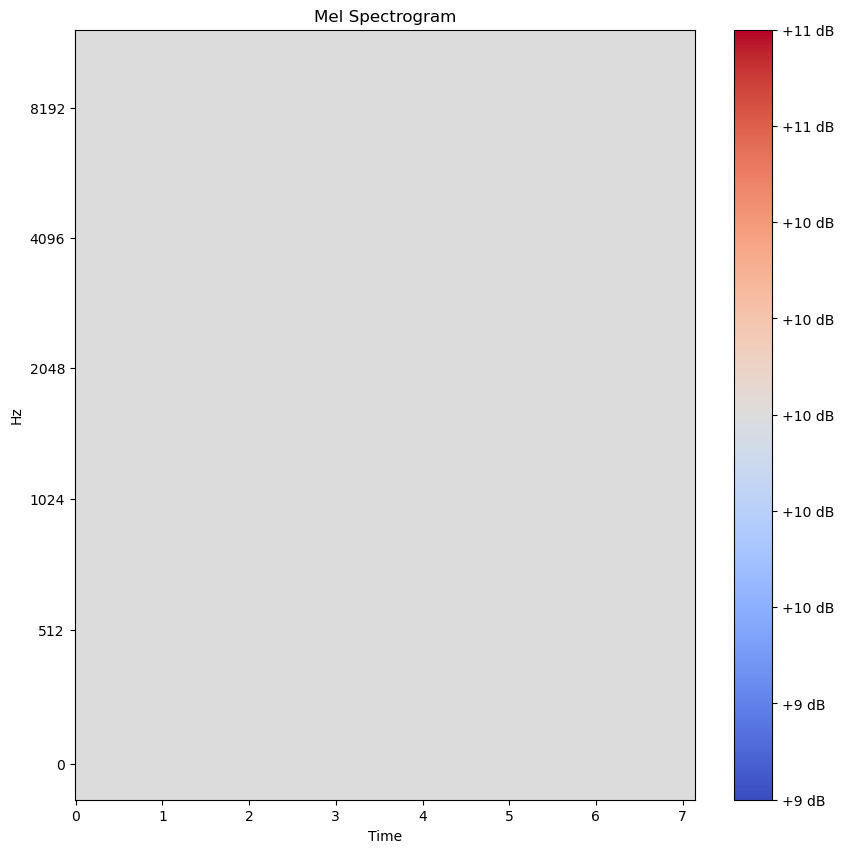

In [34]:
plt.figure(figsize=(10, 10))
librosa.display.specshow(gaji, sr=sr, hop_length=512, x_axis='time', y_axis='mel', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()

In [35]:
mfcc_gaji_zeros = np.copy(mfcc_gaji)
mfcc_gaji_zeros[:7,:] = 0
mfcc_gaji_zeros[8:,:] = 0

In [36]:
gaji_inv = scipy.fftpack.idct(mfcc_gaji_zeros, axis=0, norm='ortho')

In [37]:
gaji.shape

(13, 308)

In [38]:
for i in range(13):
    print(np.mean(gaji_inv[i,0]))

-1.9355113e-07
2.4021116e-07
1.3564264e-07
-2.72911e-07
-6.9851055e-08
2.897502e-07
0.0
-2.897502e-07
6.985106e-08
2.72911e-07
-1.3564262e-07
-2.4021116e-07
1.9355113e-07


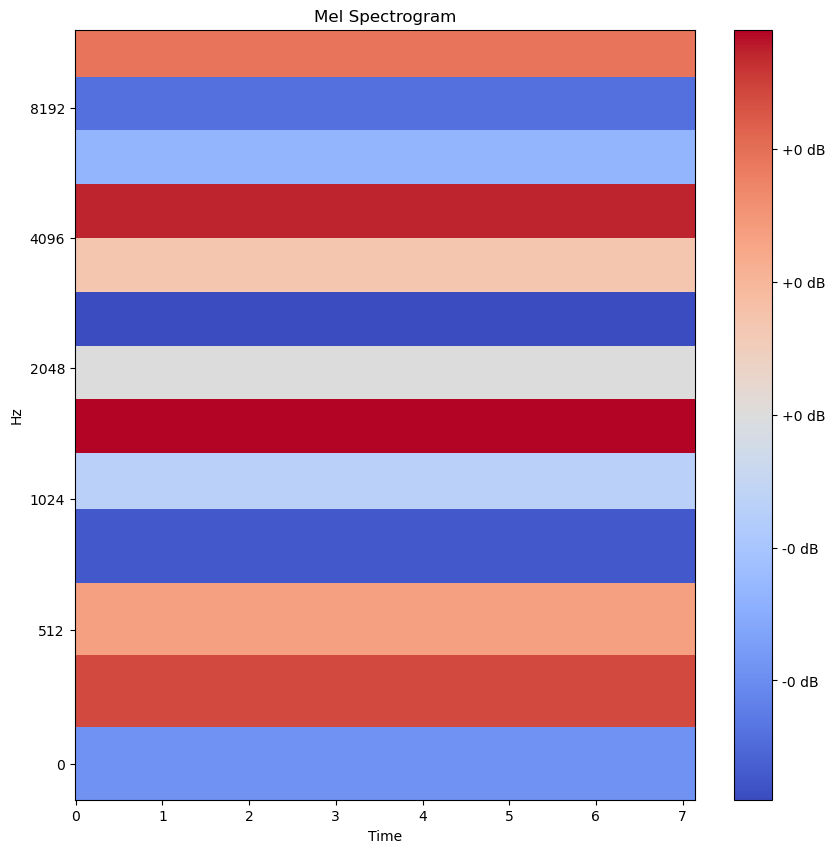

In [39]:
plt.figure(figsize=(10, 10))
librosa.display.specshow(gaji_inv, sr=sr, hop_length=512, x_axis='time', y_axis='mel', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()

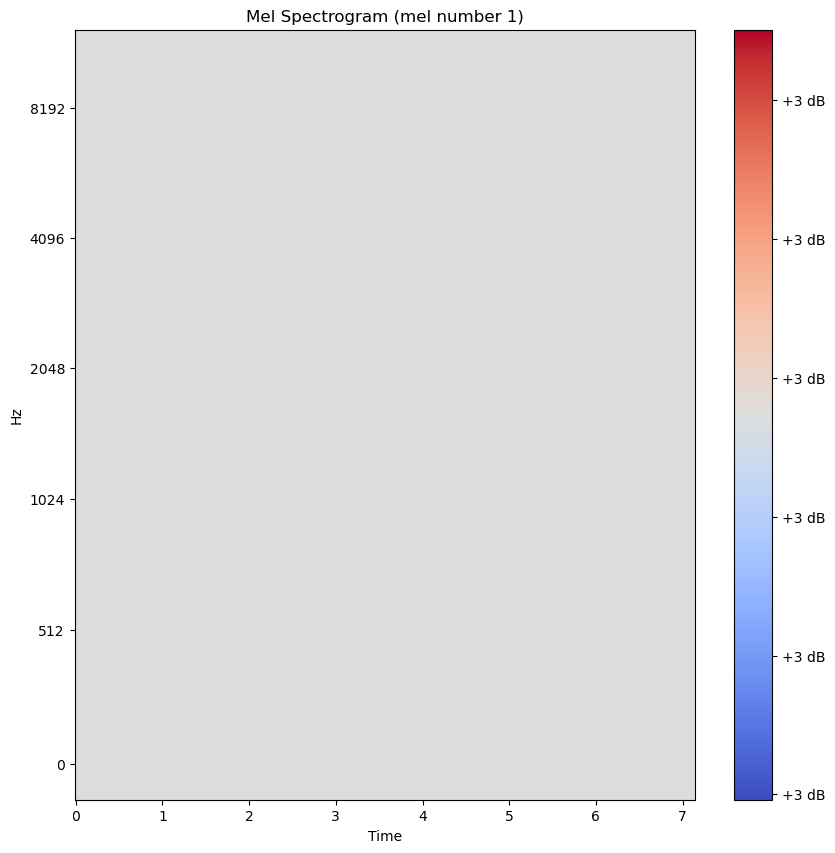

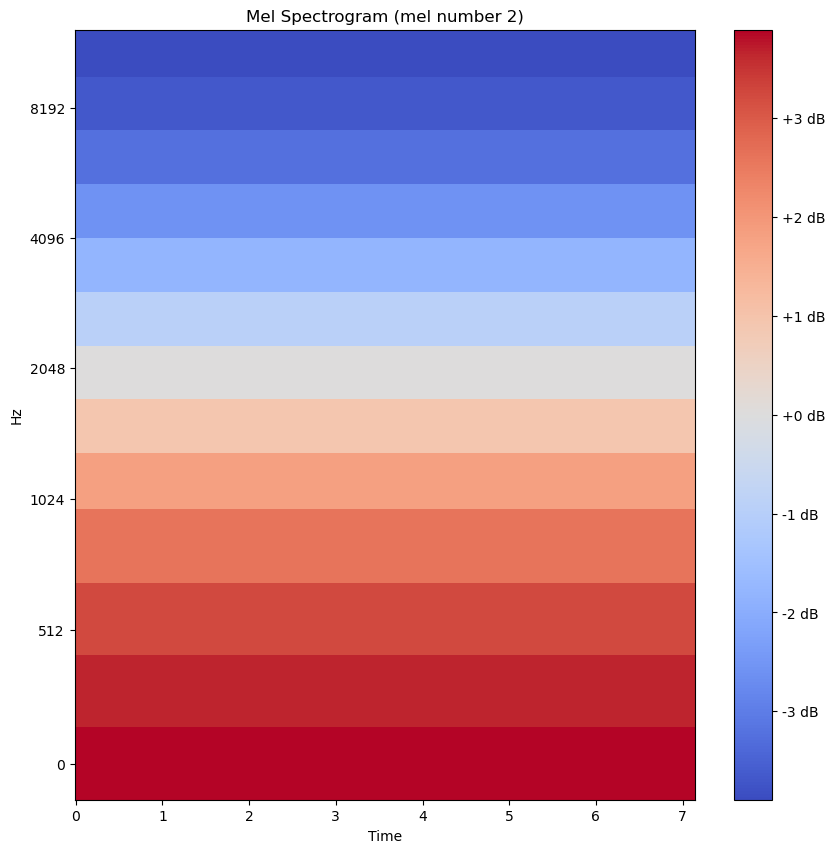

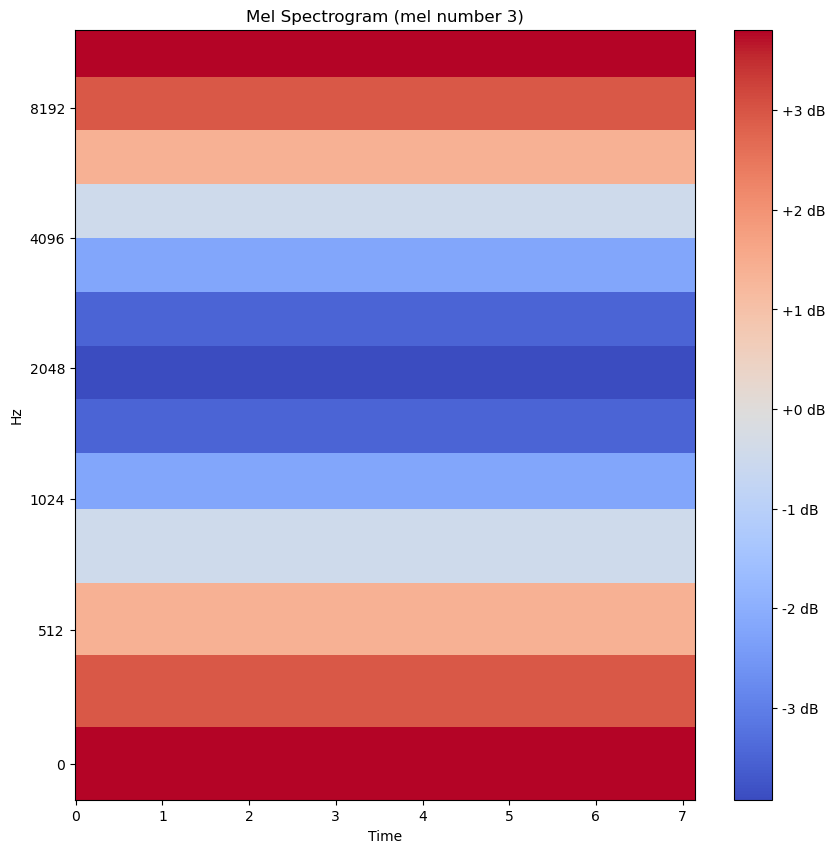

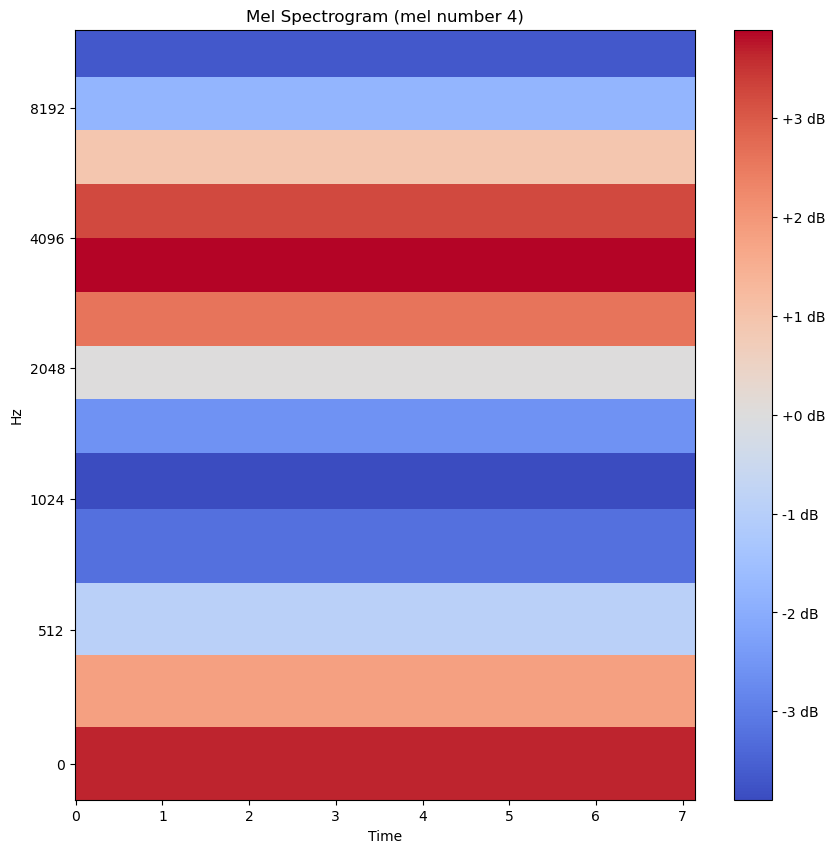

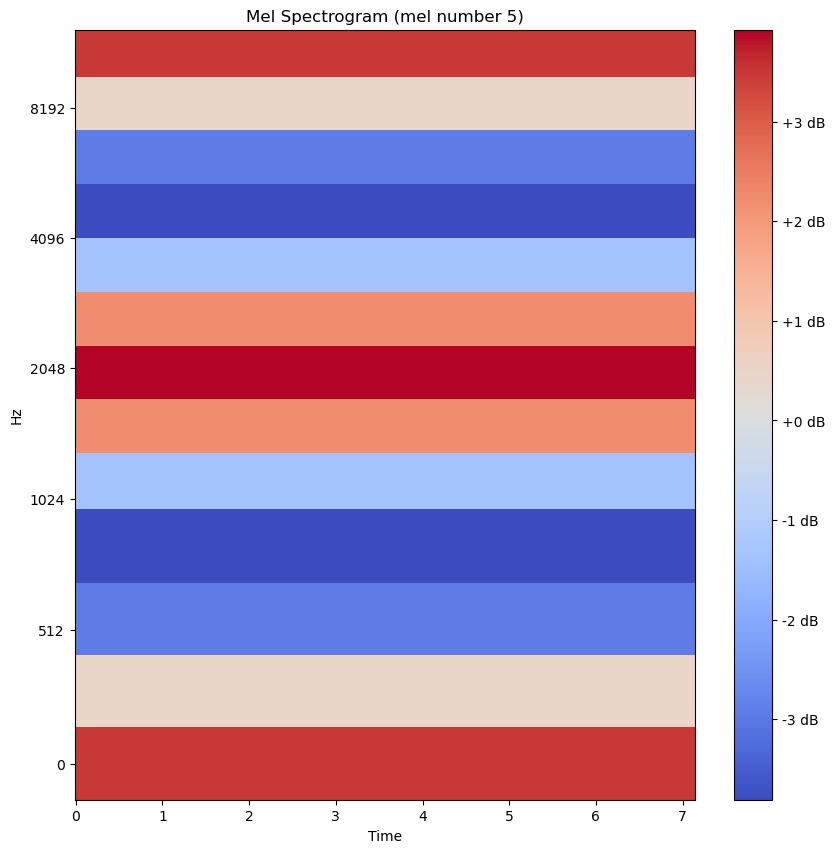

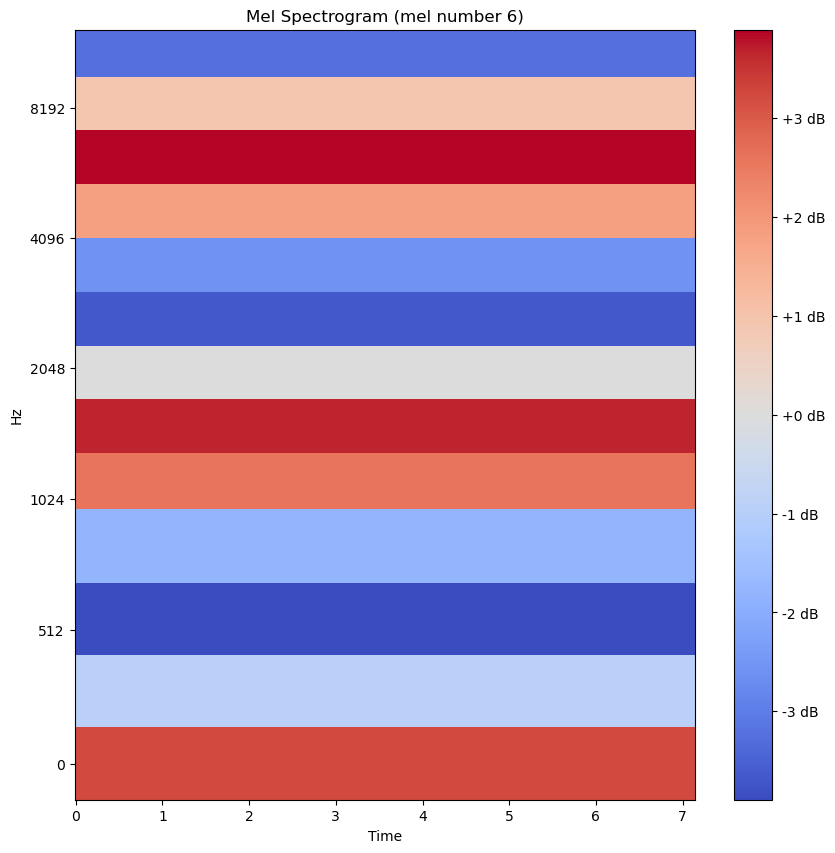

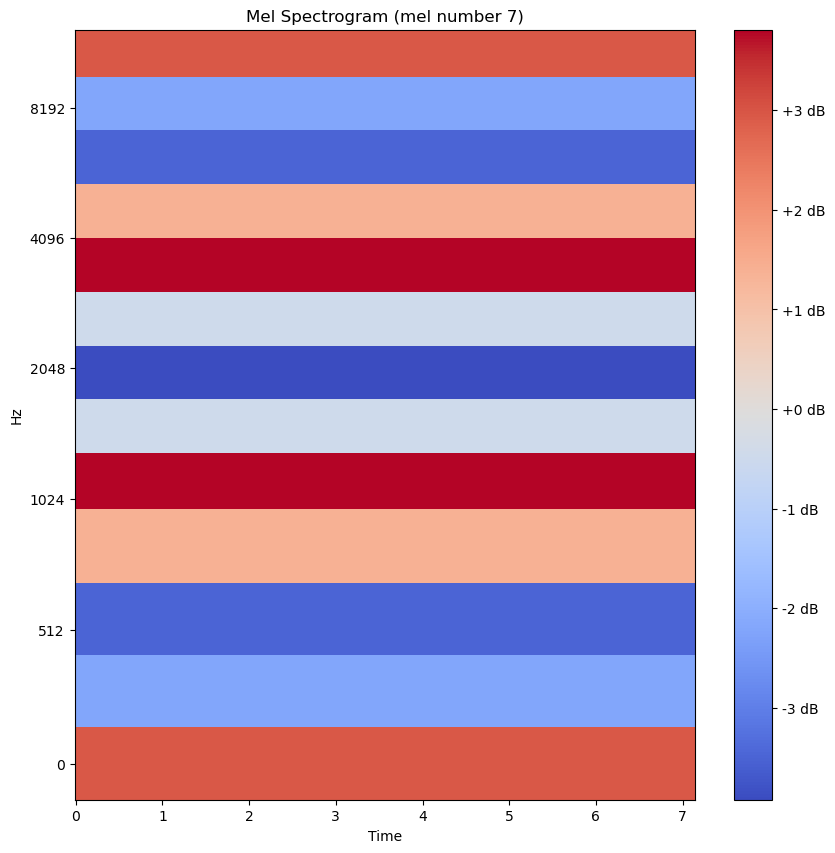

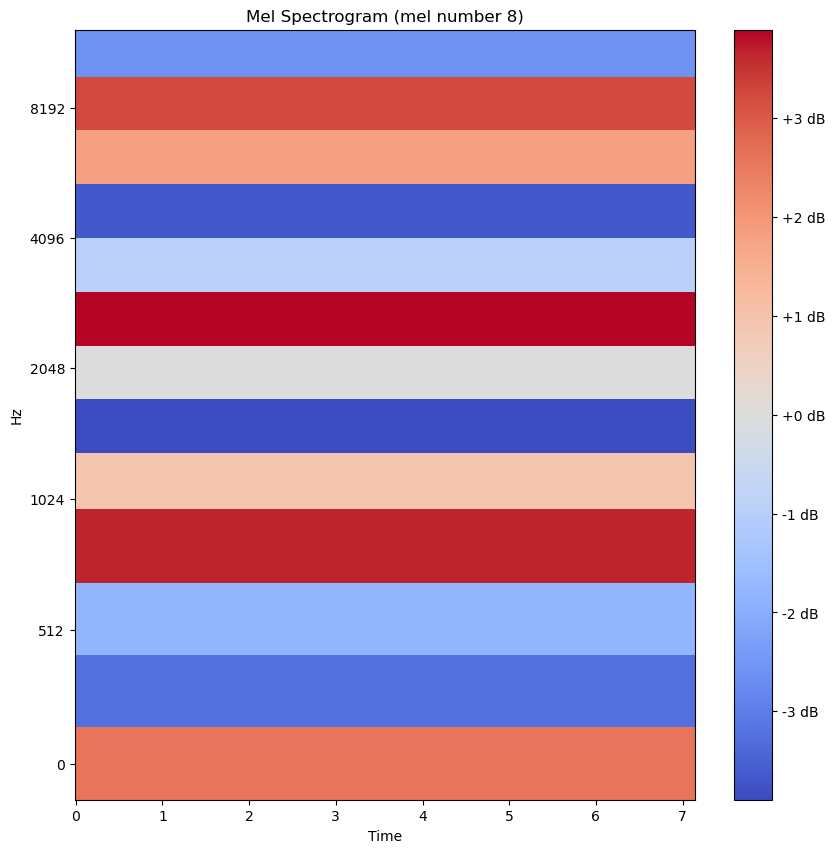

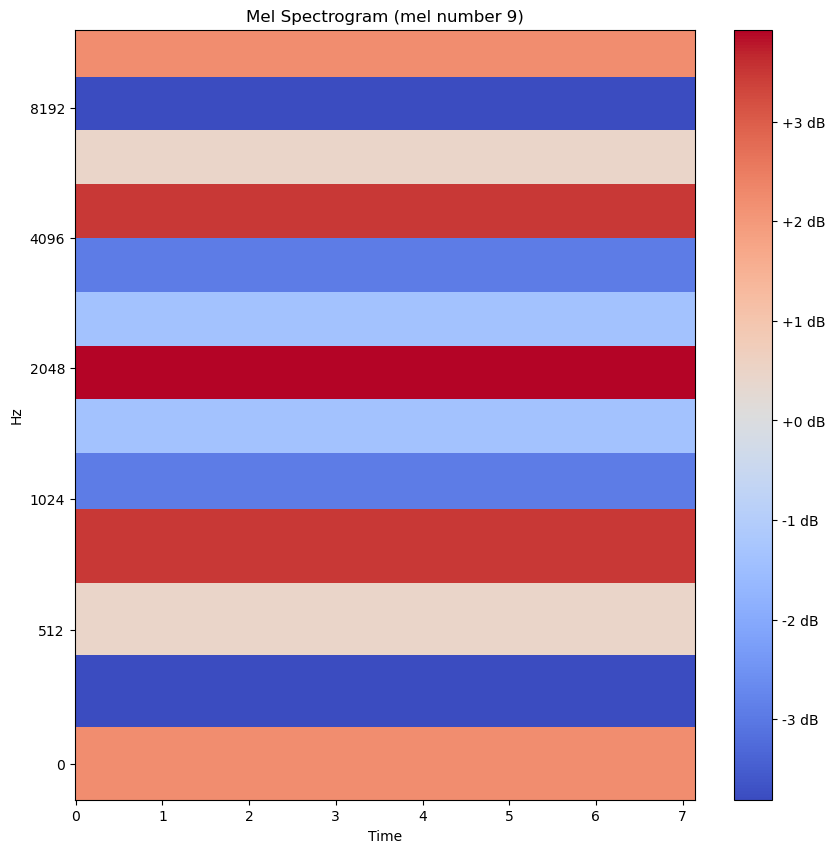

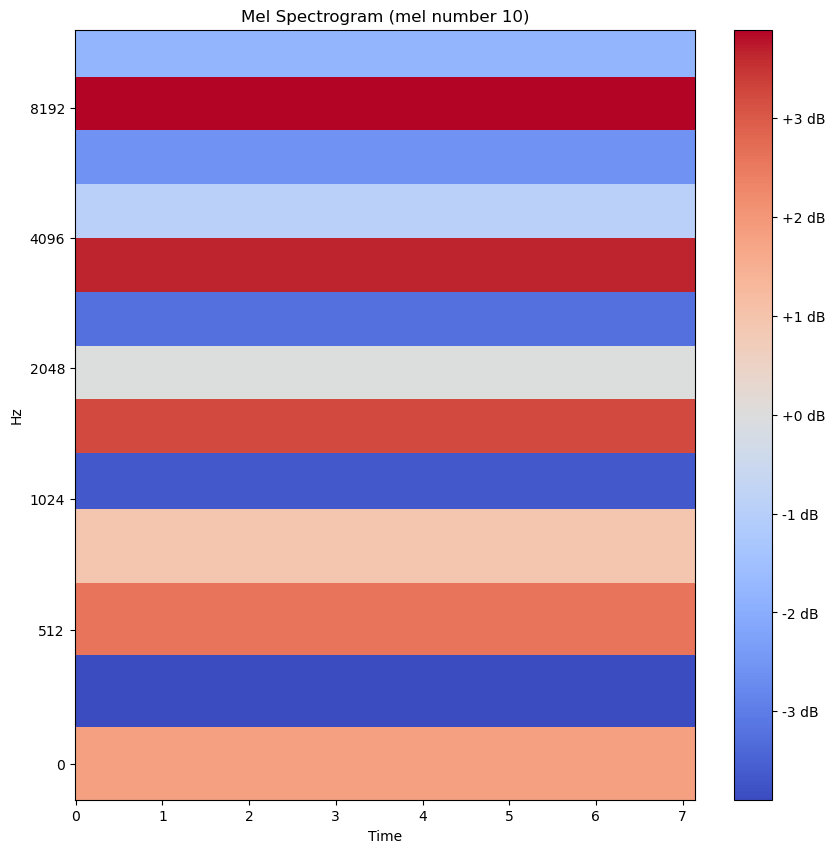

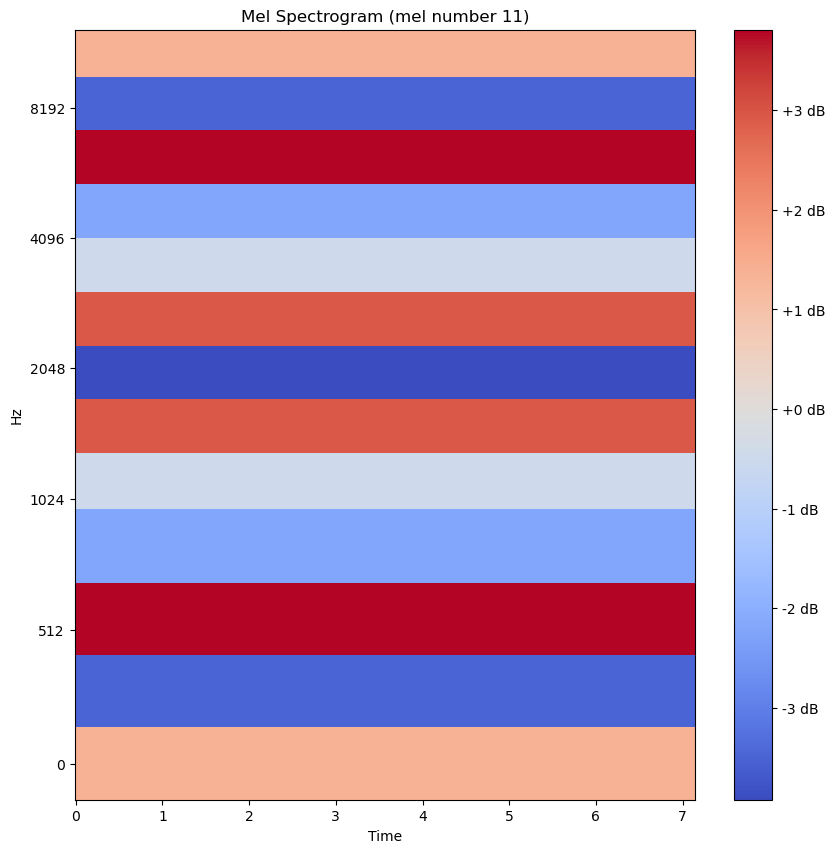

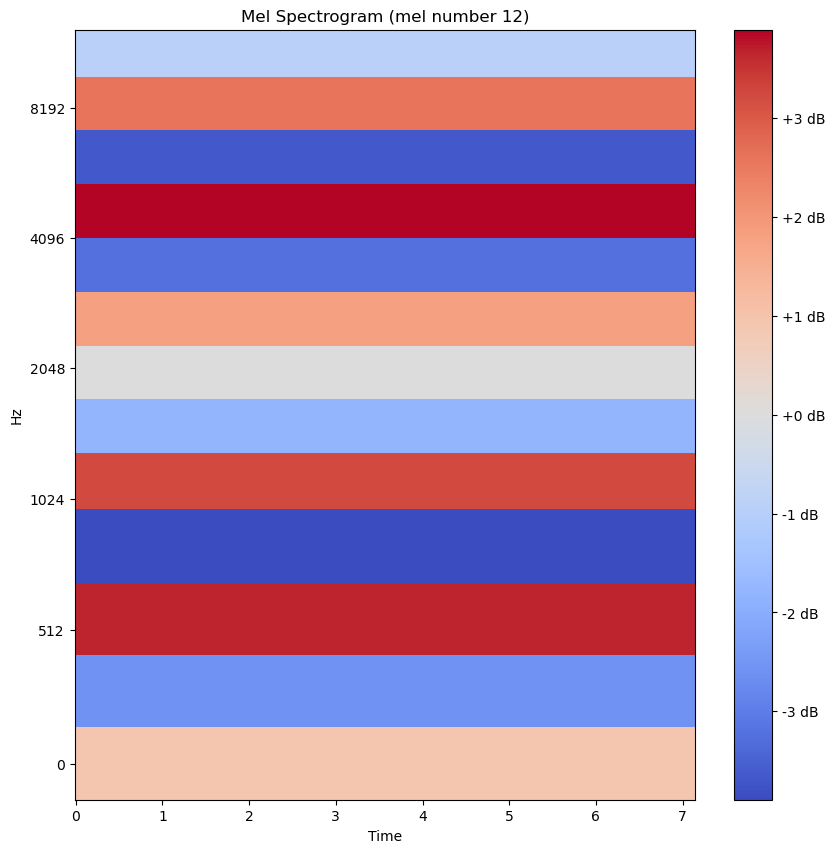

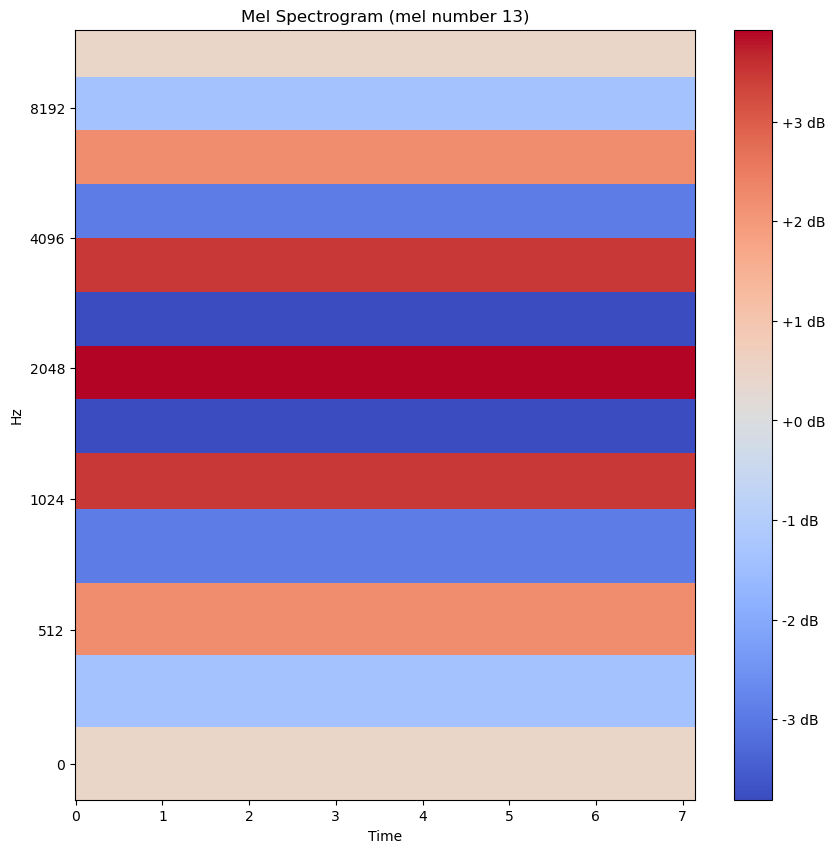

In [40]:
for i in range(13):
    gaji_zeros = np.copy(gaji)
    if i == 0:
        gaji_zeros[1:, :] = 0
    elif i == 12:
        gaji_zeros[:12, :] = 0
    else:
        gaji_zeros[:i, :] = 0
        gaji_zeros[i+1:, :] = 0
    gaji_inv = scipy.fftpack.idct(gaji_zeros, axis=0, norm='ortho')
    plt.figure(figsize=(10, 10))
    librosa.display.specshow(gaji_inv, sr=sr, hop_length=512, x_axis='time', y_axis='mel', cmap='coolwarm')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel Spectrogram (mel number {i+1})')
    plt.show()